# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - https://namjulee.github.io/njs-lab-public/

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

##### AI / ML for designers, Computational Design Class
### Smart Drawing: Vector and Raster data
NJ Namju Lee / nj.namju@gmail.com

# 01 Drawing Prediction By Image

#### 1 import libs and data generation for training

In [27]:
import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

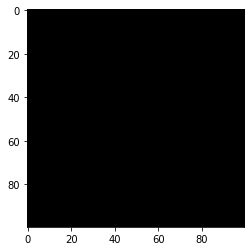

In [28]:
img = np.zeros((100, 100, 3), np.uint8)
plt.imshow(img)

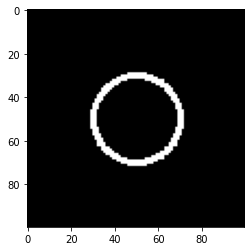

In [29]:
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
imgCircle = cv2.circle(img, (50, 50), 20, (255, 255, 255), 2)
plt.imshow(imgCircle)


In [30]:
filename = 'data/imgTest/savedImage.jpg'
cv2.imwrite(filename, imgCircle)
  

True

#### 2 Circle, Rectangle, data generation for training

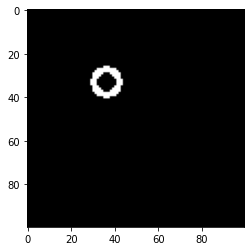

In [31]:
import random as rnd

path = 'data/img/'

observation = 1000

width = 100
height = 100


for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    r = rnd.randrange(5, ((width * 0.5) + (height * 0.5)) * 0.5 )

    if (x - r < 0):
        r = x
    if (y - r < 0):
        r = y

    if (x + r > width):
        r = width - x
    if (y + r > height):
        r = height - y


    imgCircle = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
    plt.imshow(imgCircle)
    filename = path + 'circle_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgCircle)

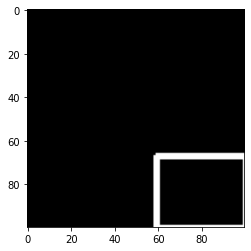

In [32]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    rectWidth = rnd.randrange(0, width)
    rectHeight = rnd.randrange(0, height)

    if (x + rectWidth > width):
        rectWidth = width - x
    if (y + rectHeight > height):
        rectHeight = height - y

    imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    plt.imshow(imgRect)
    filename = path + 'rect_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgRect)



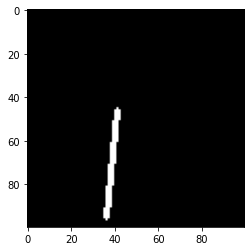

In [33]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x0 = rnd.randrange(0, width)
    y0 = rnd.randrange(0, height)

    x1 = rnd.randrange(0, width)
    y1 = rnd.randrange(0, height)

    # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    imgLine = cv2.line(canvas, (x0, y0), (x1, y1), (255, 255 ,255), 2 )
    plt.imshow(imgLine)
    filename = path + 'line_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgLine)



#### 3 Loading data & training models and validation

In [34]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

In [35]:
CLASS_INDEX = ['Circle', 'Rectangle', 'Line']
EPOCHS = 30

In [36]:
from os import walk
import numpy as np

f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

np.random.seed(222)
np.random.shuffle(f)

print (f)  

['line_221.jpg', 'rect_247.jpg', 'rect_436.jpg', 'rect_105.jpg', 'rect_94.jpg', 'rect_34.jpg', 'line_398.jpg', 'rect_533.jpg', 'circle_697.jpg', 'rect_585.jpg', 'circle_215.jpg', 'line_618.jpg', 'circle_174.jpg', 'circle_395.jpg', 'line_270.jpg', 'circle_789.jpg', 'circle_516.jpg', 'rect_320.jpg', 'rect_713.jpg', 'circle_272.jpg', 'circle_608.jpg', 'circle_257.jpg', 'rect_214.jpg', 'rect_719.jpg', 'rect_415.jpg', 'rect_699.jpg', 'rect_292.jpg', 'circle_604.jpg', 'circle_322.jpg', 'line_130.jpg', 'rect_922.jpg', 'line_367.jpg', 'rect_390.jpg', 'line_583.jpg', 'rect_134.jpg', 'circle_620.jpg', 'rect_452.jpg', 'rect_195.jpg', 'rect_832.jpg', 'circle_886.jpg', 'line_154.jpg', 'rect_514.jpg', 'circle_677.jpg', 'rect_31.jpg', 'line_978.jpg', 'circle_442.jpg', 'rect_660.jpg', 'circle_37.jpg', 'rect_237.jpg', 'line_414.jpg', 'line_211.jpg', 'rect_217.jpg', 'circle_308.jpg', 'rect_650.jpg', 'line_376.jpg', 'line_954.jpg', 'rect_614.jpg', 'line_936.jpg', 'rect_79.jpg', 'rect_949.jpg', 'rect_850.

In [37]:

data = []
classList = []

for i in f:
    # print(i)
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    # print(path)
    img = cv2.imread(thePath)
    print(img.shape)
    # print(type(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    array = tf.keras.preprocessing.image.img_to_array(img).flatten()
    data.append(array)

data = np.array(data)
classList = np.array(classList)


(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [38]:
print(data.shape)
print(data)
print(classList)

(3000, 10000)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 253. 255. 255.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[1 2 2 ... 2 0 1]


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)

In [40]:
print(X_train.shape)
print(X_test.shape)

(2100, 10000)
(900, 10000)


In [41]:
X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

In [42]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(800, 3)


In [43]:
model = Sequential([
  Input(shape=(100 * 100 * 1)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 248)               2480248   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               31872     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 2,520,571
Trainable params: 2,520,571
Non-trainable params: 0
_________________________________________________________________


In [44]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
66/66 [==============================] - 2s 8ms/step - loss: 11.1920 - accuracy: 0.5552 - val_loss: 6.6332 - val_accuracy: 0.5537
Epoch 2/30
66/66 [==============================] - 0s 5ms/step - loss: 2.6796 - accuracy: 0.7681 - val_loss: 5.8391 - val_accuracy: 0.6162
Epoch 3/30
66/66 [==============================] - 0s 4ms/step - loss: 1.2589 - accuracy: 0.8762 - val_loss: 4.9888 - val_accuracy: 0.6413
Epoch 4/30
66/66 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.9386 - val_loss: 4.4565 - val_accuracy: 0.7188
Epoch 5/30
66/66 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.9610 - val_loss: 5.2514 - val_accuracy: 0.6800
Epoch 6/30
66/66 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.9548 - val_loss: 5.1066 - val_accuracy: 0.7113
Epoch 7/30
66/66 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.9576 - val_loss: 6.3674 - val_accuracy: 0.6750
Epoch 8/30
66/66 [=

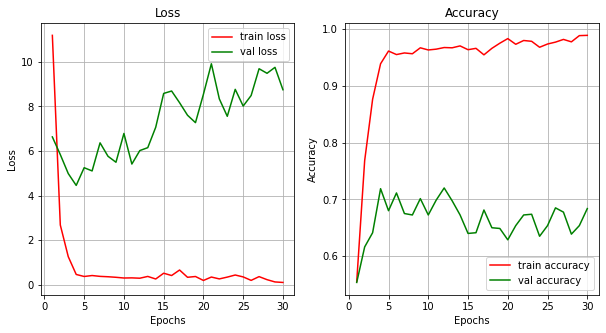

In [45]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

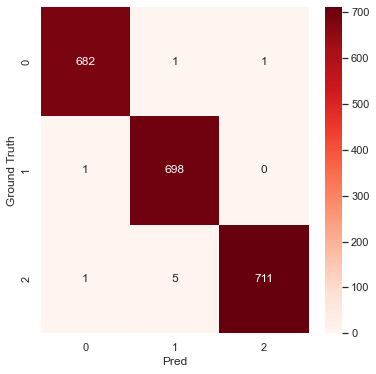

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='dark')
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [47]:
data = []
classList = []

for i in f:
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    img = cv2.imread(thePath)
    array = tf.keras.preprocessing.image.img_to_array(img)
    data.append(array)

data = np.array(data)
classList = np.array(classList)
print(data.shape)

(3000, 100, 100, 3)


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(2100, 100, 100, 3)
(900, 100, 100, 3)
(800, 3)


In [49]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 248)               7440248   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               31872     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 7,480,571
Trainable params: 7,480,571
Non-trainable params: 0
_________________________________________________________________


In [50]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
66/66 [==============================] - 1s 10ms/step - loss: 26.2061 - accuracy: 0.5619 - val_loss: 13.5619 - val_accuracy: 0.6450
Epoch 2/30
66/66 [==============================] - 0s 7ms/step - loss: 7.8742 - accuracy: 0.7681 - val_loss: 13.4950 - val_accuracy: 0.6400
Epoch 3/30
66/66 [==============================] - 0s 6ms/step - loss: 3.5961 - accuracy: 0.8762 - val_loss: 13.9096 - val_accuracy: 0.6488
Epoch 4/30
66/66 [==============================] - 0s 6ms/step - loss: 2.7667 - accuracy: 0.9038 - val_loss: 13.0812 - val_accuracy: 0.6388
Epoch 5/30
66/66 [==============================] - 0s 6ms/step - loss: 1.6992 - accuracy: 0.9310 - val_loss: 13.8073 - val_accuracy: 0.6687
Epoch 6/30
66/66 [==============================] - 0s 6ms/step - loss: 1.6502 - accuracy: 0.9448 - val_loss: 15.8970 - val_accuracy: 0.6538
Epoch 7/30
66/66 [==============================] - 0s 6ms/step - loss: 1.8192 - accuracy: 0.9352 - val_loss: 17.6392 - val_accuracy: 0.6413
Epoch 8/30


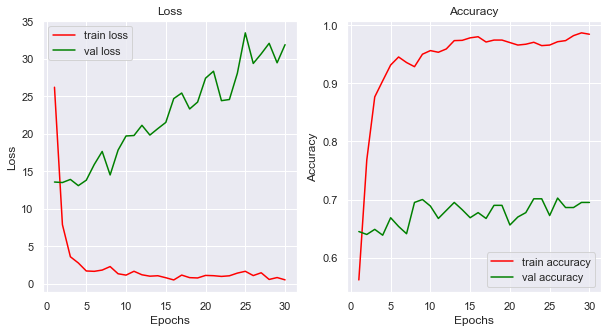

In [51]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [52]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)

4/4 [==============================] - 0s 4ms/step - loss: 15.0734 - accuracy: 0.7400


[15.073394775390625, 0.7400000095367432]

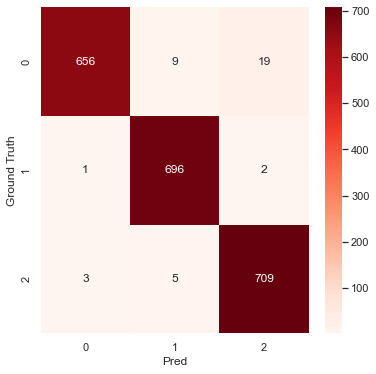

In [53]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [54]:
from keras.layers import Dropout

In [55]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 248)               7440248   
_________________________________________________________________
dropout (Dropout)            (None, 248)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               31872     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

4/4 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.8200


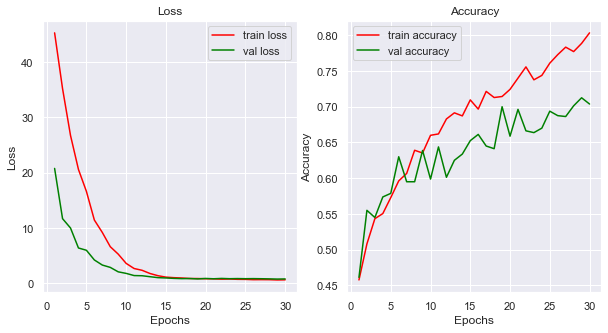

In [56]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

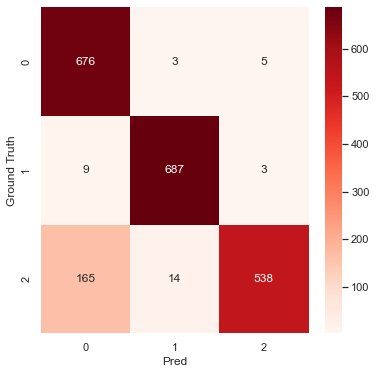

In [57]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense, Input

In [59]:
modelSecond = Sequential(
    [
        Input(shape=(100,100,3)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(len(Y_test[1]), activation="softmax"),
    ]
)

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

In [60]:
histSecond = modelSecond.fit(
    X_train, Y_train, 
    epochs = EPOCHS, batch_size=64,
    # verbose=0,
    validation_data=(X_test, Y_test)
    )


Epoch 1/30
33/33 [==============================] - 8s 35ms/step - loss: 10.5065 - accuracy: 0.4614 - val_loss: 0.9593 - val_accuracy: 0.5437
Epoch 2/30
33/33 [==============================] - 1s 20ms/step - loss: 0.8235 - accuracy: 0.6762 - val_loss: 0.8085 - val_accuracy: 0.6212
Epoch 3/30
33/33 [==============================] - 1s 18ms/step - loss: 0.5710 - accuracy: 0.7681 - val_loss: 0.7160 - val_accuracy: 0.6850
Epoch 4/30
33/33 [==============================] - 1s 18ms/step - loss: 0.4714 - accuracy: 0.8233 - val_loss: 0.7292 - val_accuracy: 0.6850
Epoch 5/30
33/33 [==============================] - 1s 18ms/step - loss: 0.3985 - accuracy: 0.8400 - val_loss: 0.7152 - val_accuracy: 0.7100
Epoch 6/30
33/33 [==============================] - 1s 18ms/step - loss: 0.3465 - accuracy: 0.8681 - val_loss: 0.7308 - val_accuracy: 0.7375
Epoch 7/30
33/33 [==============================] - 1s 17ms/step - loss: 0.2799 - accuracy: 0.8971 - val_loss: 0.7136 - val_accuracy: 0.7462
Epoch 8/30
3

4/4 [==============================] - 0s 29ms/step - loss: 0.5869 - accuracy: 0.8500


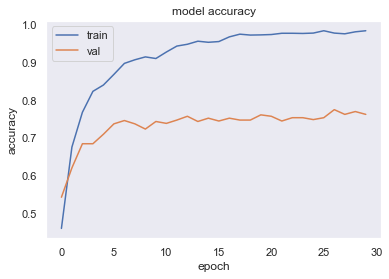

In [61]:
modelSecond.evaluate(X_train, Y_train)
modelSecond.evaluate(X_test, Y_test)
modelSecond.evaluate(X_Val, Y_Val)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

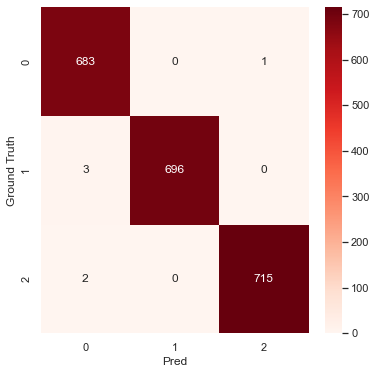

In [62]:
predY = modelSecond.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

#### 5 Testing models

In [63]:
from os import walk
import numpy as np

path = 'data/imgTest/'
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

print (f)  

['circle_01.jpg', 'circle_02.jpg', 'circle_03.jpg', 'savedImage.jpg']


In [64]:
data = []
classList = []

for i in f:
    thePath = path + i
    img = cv2.imread(thePath)
    # print(array.shape)
    data.append(array)

data = np.array(data)
print(data.shape)

(4, 100, 100, 3)


In [65]:
results = modelSecond.predict(data)
print(results)

resultsss = model.predict(data)
print(results)

[[9.7457868e-01 2.5399018e-02 2.2281502e-05]
 [9.7457868e-01 2.5399018e-02 2.2281502e-05]
 [9.7457868e-01 2.5399018e-02 2.2281502e-05]
 [9.7457868e-01 2.5399018e-02 2.2281502e-05]]
[[9.7457868e-01 2.5399018e-02 2.2281502e-05]
 [9.7457868e-01 2.5399018e-02 2.2281502e-05]
 [9.7457868e-01 2.5399018e-02 2.2281502e-05]
 [9.7457868e-01 2.5399018e-02 2.2281502e-05]]


In [66]:
for result in results:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

for result in resultsss:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

Circle 0.9745787
Circle 0.9745787
Circle 0.9745787
Circle 0.9745787
Circle 0.4259457
Circle 0.4259457
Circle 0.4259457
Circle 0.4259457


In [69]:
def getDrawing(type):
    offset = 5
    theWidth = width - offset
    theHeight = height - offset
    canvas = np.zeros(( width, height, 3), np.uint8)
    x = rnd.randrange(0, theHeight) + offset
    y = rnd.randrange(0, theHeight) + offset

    if type == 'cir':
        r = rnd.randrange(5, (int(theWidth * 0.5) + int(theHeight * 0.5)) * 0.5 )
        if (x - r < 0):
            r = x
        if (y - r < 0):
            r = y

        if (x + r > theWidth):
            r = theWidth - x
        if (y + r > theHeight):
            r = theHeight - y

        if (r < 1):
            r = 1

        img = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
        return img

    elif type == 'rect':
        rectWidth = rnd.randrange(0, theWidth)
        rectHeight = rnd.randrange(0, theHeight)
        if (x + rectWidth > theWidth):
            rectWidth = theWidth - x
        if (y + rectHeight > theHeight):
            rectHeight = theHeight - y
        img = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        return img

    elif type == 'line':
        x1 = rnd.randrange(0, theWidth)
        y1 = rnd.randrange(0, theHeight)
        # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        img = cv2.line(canvas, (x, y), (x1, y1), (255, 255 ,255), 2 )
        return img
def img2array(img):
    return tf.keras.preprocessing.image.img_to_array(img)

shape (100, 100, 3)
[[9.9987423e-01 1.2573421e-04 3.0324165e-15]]
Circle 99.98742341995239
[[99  0  0]]


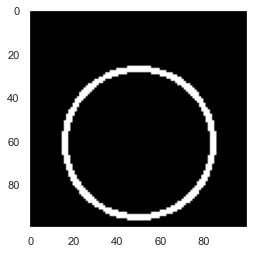

In [70]:
cir = getDrawing('cir')
plt.imshow(cir)

array = img2array(cir)
print('shape', array.shape)

result = modelSecond.predict(np.array([array]))
print(result)
index = np.argmax(result)

print(CLASS_INDEX[index], result[0][index] * 100)
print((result * 100).astype(int))

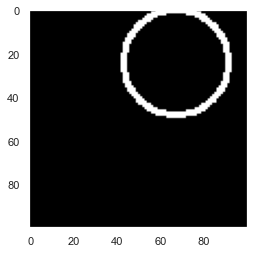

[[1.0000000e+00 1.2586639e-08 8.1719145e-17]]
Circle 100.0
[[100   0   0]]


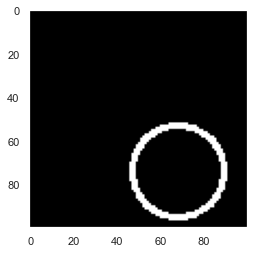

[[4.5975849e-01 5.4024154e-01 2.5146058e-08]]
Rectangle 54.0241539478302
[[45 54  0]]


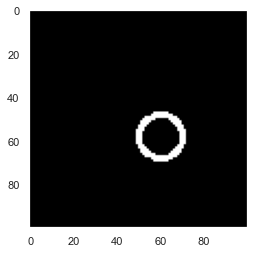

[[9.6788746e-01 3.2112494e-02 2.1258508e-08]]
Circle 96.78874611854553
[[96  3  0]]


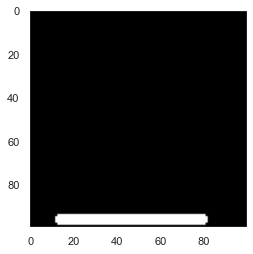

[[1.7503592e-06 8.0425251e-01 1.9574571e-01]]
Rectangle 80.42525053024292
[[ 0 80 19]]


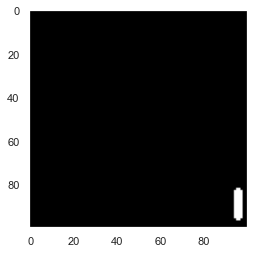

[[1.9996797e-03 1.2030211e-04 9.9788010e-01]]
Line 99.78801012039185
[[ 0  0 99]]


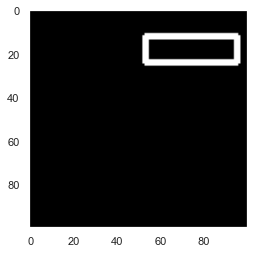

[[2.6162557e-05 4.5937398e-03 9.9538016e-01]]
Line 99.5380163192749
[[ 0  0 99]]


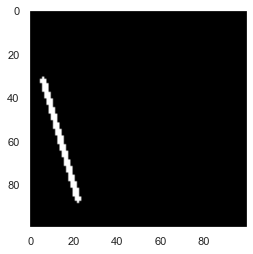

[[9.99790013e-01 2.09956328e-04 1.13503994e-13]]
Circle 99.97900128364563
[[99  0  0]]


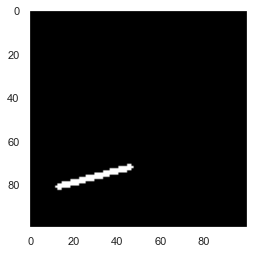

[[6.0125571e-02 9.3987423e-01 1.9337368e-07]]
Rectangle 93.98742318153381
[[ 6 93  0]]


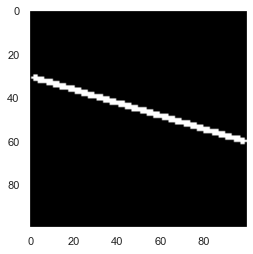

[[1.4187241e-02 9.8581266e-01 8.8490992e-08]]
Rectangle 98.58126640319824
[[ 1 98  0]]


In [71]:
def getPrediction(typeShape):
    cir = getDrawing(typeShape)
    plt.imshow(cir)
    plt.show()

    array = img2array(cir)
    # print('shape', array.shape)

    result = modelSecond.predict(np.array([array]))
    print(result)
    index = np.argmax(result)

    print(CLASS_INDEX[index], result[0][index] * 100)
    print((result * 100).astype(int))

typeShapes = ['cir', 'cir', 'cir', 'rect', 'rect', 'rect', 'line', 'line', 'line']
for t in typeShapes:
    getPrediction(t)
